# Polynomial Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('data/mtcars.csv')

In [4]:
df.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


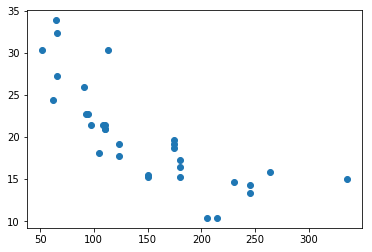

In [5]:
plt.scatter(df.hp, df.mpg)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
PolynomialFeatures?

Init signature: PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Parameters
----------
degree : integer
    The degree of the polynomial features. Default = 2.

interaction_only : boolean, default = False
    If true, only interaction features are produced: features that are
    products of at most ``degree`` *distinct* input features (so not
    ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).

include_bias : boolean
    If True (default), then include a bias column, the feature in which
    all polynomial powers are zero (i.e. a column of ones - acts as an
    intercept term in a linear model).

Examples
--------
>>> X = np.ara

In [8]:
X = np.arange(6).reshape(3, 2)

In [9]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
poly_feats = PolynomialFeatures(degree=2)

In [11]:
poly_feats.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [12]:
poly_feats.transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [13]:
poly_feats.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [14]:
df.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [44]:
X = df[['hp']]

In [45]:
X_poly = poly_feats.fit_transform(X)

In [46]:
X_poly.shape

(32, 3)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_poly, df.mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lr.coef_

array([ 0.        , -0.21330826,  0.00042082])

In [51]:
predictions = lr.predict(X_poly)
predictions

array([22.03707773, 22.03707773, 24.21108341, 22.03707773, 15.96765036,
       22.65124222, 13.40805167, 28.80162037, 23.94269356, 20.53872089,
       20.53872089, 15.64805681, 15.64805681, 15.64805681, 14.36570074,
       14.00004379, 13.60936421, 28.16384493, 30.45497315, 28.32202634,
       23.67767025, 17.88122987, 17.88122987, 13.40805167, 15.96765036,
       28.16384493, 24.48283978, 21.6786786 , 13.42490269, 15.96765036,
       16.17688413, 22.15822736])

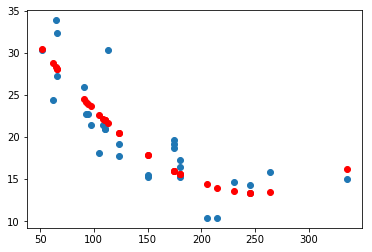

In [55]:
plt.scatter(df.hp, df.mpg)
plt.plot(df.hp, predictions, 'ro')

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
Pipeline?

Init signature: Pipeline(steps, memory=None)
Docstring:     
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
to None.

Read more in the :ref:`User Guide <pipeline>`.

Parameters
----------
steps : list
    List of (name, transform) tuples (implementing fit/transform) that are
    

In [58]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [59]:
X = df[['hp']]
y = df['mpg']

In [60]:
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [61]:
pipe.predict(X)

array([22.03707773, 22.03707773, 24.21108341, 22.03707773, 15.96765036,
       22.65124222, 13.40805167, 28.80162037, 23.94269356, 20.53872089,
       20.53872089, 15.64805681, 15.64805681, 15.64805681, 14.36570074,
       14.00004379, 13.60936421, 28.16384493, 30.45497315, 28.32202634,
       23.67767025, 17.88122987, 17.88122987, 13.40805167, 15.96765036,
       28.16384493, 24.48283978, 21.6786786 , 13.42490269, 15.96765036,
       16.17688413, 22.15822736])

In [63]:
#these are all the degrees we will search
params = {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}

In [64]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [68]:
grid.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
best = grid.best_estimator_

In [73]:
best.named_steps['lr'].coef_

array([ 0.        , -0.21330826,  0.00042082])

In [94]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [95]:
cali = fetch_california_housing()
X = cali.data
y = cali.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#we need to setup a pipeline
pipe = Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])
#we need params for PolynomialFeatures (degree = )
params = {'poly__degree': [2, 3, 4, 5, 6, 7]}
#we need train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y)
#we need a grid to search over
grid = GridSearchCV(pipe, param_grid=params, cv = 5)
#we need to make predictions
grid.fit(X_train, y_train)
#evaluate these on test_set
preds = grid.predict(X_test)

In [ ]:
grid.best_estimator_

In [ ]:
lr.fit()
lr.score(X, y)

In [91]:
X_train = df.hp[:-10]
y_train = df.mpg[:-10]
X_test = df.hp[-10:]
y_test = df.mpg[-10:]
rmse = []
deg = []
for i in range(1, 10):
    p = np.polyfit(X_train, y_train, i)
    yhat = np.polyval(p, X_test)
    rms = np.sqrt(sum((y_test - yhat)**2))
    rmse.append(rms)


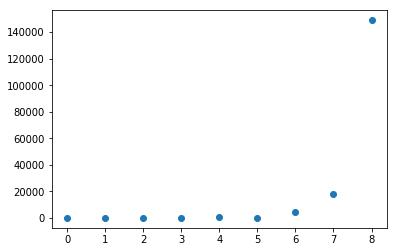

In [92]:
plt.plot(rmse, 'o')

In [ ]:
np.polyfit()